# Visualising the Pattern

We understand better the patterns in numbers by visualising them. Typically, we have 4 factors to encode information: the x-axis, y-axis, colour and shape. Of course, we can think of innovative ways to increase this like an added dimension or different line styles but we also don't want to overburden the reader perform extra layers of interpretation. We want to guide the reader towards an easily interpretable figure which communicates the story that we want to tell. In this next section, we will use covid cases and variants by country and time to examine the following research questions:
1) Which variants had the greatest detection record globally and when did this occur?
2) How do cases of these variants differ across different countries?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_df = pd.read_csv('covid-variants.csv')
covid_df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [3]:
# num sequences are the number of cases

In [5]:
# groupby creates a new dataframe with an index 'date'. By calling .sum(), the dataframe populates numeric columns with the sum over the specified index
# in this case, country and variant have been conditioned out of the summation.
covid_df.groupby('date').sum().head()

,num_sequences,perc_sequences,num_sequences_total
date,,,
2020-05-11,32872,15600.0,394464
2020-05-25,25806,14400.0,309672
2020-06-08,19320,15600.0,231840
2020-06-22,32320,15800.0,387840
2020-07-06,31528,14800.0,378336


### Plot Total Variants across Time
Totals are aggregated by location

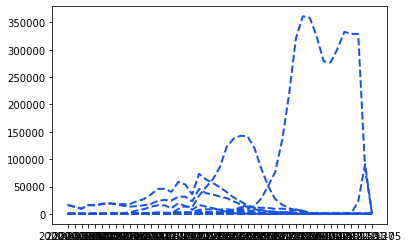

In [6]:
variants = covid_df['variant'].unique()

# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(6, 4))

for variant in variants:
    # get data from variant
    variant_df = covid_df[covid_df['variant'] == variant]
    # get time series dataframe of variants summed over all countries
    variant_time = variant_df.groupby('date').sum()
    # plot time-series for this variant
    plt.plot(variant_time.index,   variant_time["num_sequences"],   color="#1653E4", linestyle="--", linewidth=2, label="Delta")

Have a go at formatting the graph with the following changes:
 * show each variant in a different colour
 * format the x-axis to show date
 * plot legend
 * show variants with largest cumulative counts (top5)
 * remove top and right borders 
 * add titles and axis

### Students don't see this part - this is essentially the answer to formatting questions above

In [7]:
# format axis globally to remove right and top borders and allow for scientific notation of y-scale
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.formatter.limits'] = (-2,2)

In [8]:
# get only the variants with highest counts
top_variants = covid_df.groupby('variant').sum()['num_sequences'].nlargest(5).index

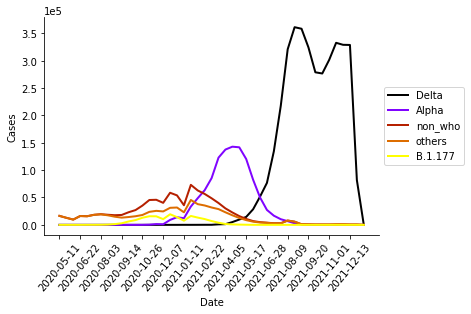

In [11]:
# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(6, 4))

# colormap
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]

for i, variant in enumerate(top_variants):
    # get time-series data for each variant
    variant_time = covid_df[covid_df['variant'] == variant].groupby('date').sum()
    # plot time-series for this variant
    plt.plot(variant_time.index,   variant_time["num_sequences"], color=colors[i],  linestyle="-", linewidth=2, label=variant)

# x axis ticks
plt.xticks(rotation=50)
# reduce number of ticks
plt.xticks(np.arange(0, len(variant_time.index), 3.0))
# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# titles
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

### Plot Total Variants across Time for each Country
We will choose the countries with highest number of cases

In [12]:
top_countries = covid_df.groupby('location').sum()['num_sequences'].nlargest(3).index

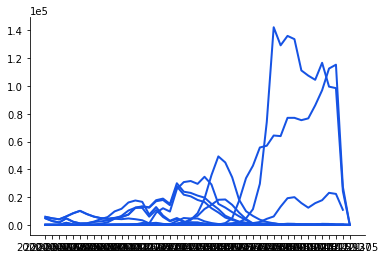

In [13]:
# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(6, 4))

for i, country in enumerate(top_countries):
    for j, variant in enumerate(top_variants):
        variant_df = covid_df[covid_df['variant'] == variant]
        variant_country_df = variant_df[variant_df['location'] == country]
        time_df = variant_country_df.groupby('date').sum()
        # plot time-series for this variant
        plt.plot(time_df.index,  time_df["num_sequences"],  color="#1653E4", linestyle='-', linewidth=2)

## Even after we add two dimensions of information - colour and shape, there is still a lot of information on one graph

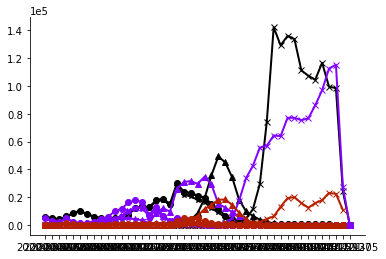

In [14]:
# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(6, 4))

# colormap
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]
markers = ['x', '^', 'o', '*', 'X']

for i, country in enumerate(top_countries):
    for j, variant in enumerate(top_variants):
        variant_df = covid_df[covid_df['variant'] == variant]
        variant_country_df = variant_df[variant_df['location'] == country]
        time_df = variant_country_df.groupby('date').sum()
        # plot time-series for this variant
        plt.plot(time_df.index,  time_df["num_sequences"], color = colors[i], marker = markers[j],linestyle='-', linewidth=2)

## We'll instead plot each country on a separate subplot

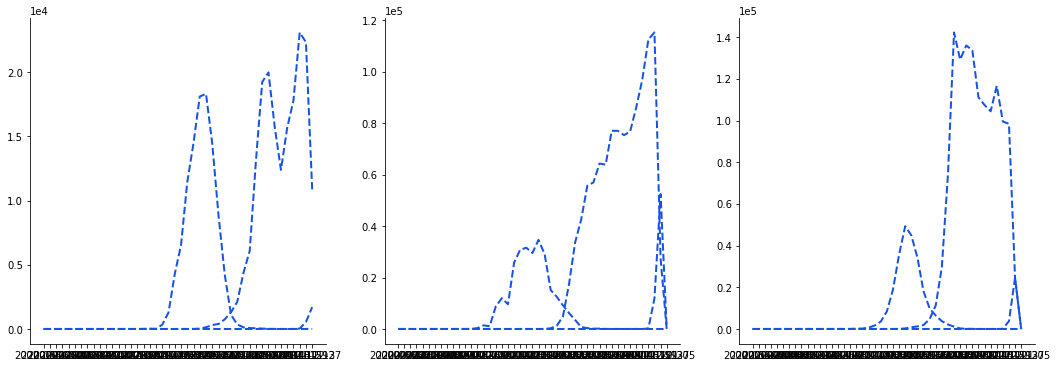

In [15]:
# plot instead on 3 subplots
# Create a new figure of size 18 by 6 inches (width and height) with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

top_countries = ['Germany', 'United Kingdom', 'United States']
top_variants = ['Alpha', 'Delta', 'Omicron']
ax = [ax1, ax2, ax3] 

for (i,country) in enumerate(top_countries):
    for (j,variant) in enumerate(top_variants):
        variant_df = covid_df[covid_df['variant'] == variant]
        variant_country_df = variant_df[variant_df['location'] == country]
        time_df = variant_country_df.groupby('date').sum()
        # plot time-series for this variant
        ax[i].plot(time_df.index,  time_df["num_sequences"], color="#1653E4", linestyle="--", linewidth=2)

Have a go at formatting the graph with the following changes:
 * align the axis so it's all on the same scale
 * show each variant in a different colour
 * format the x-axis to show date
 * plot legend
 * remove top and right borders 
 * add titles and axis

### Students don't see this part - this is essentially the answer to formatting questions above

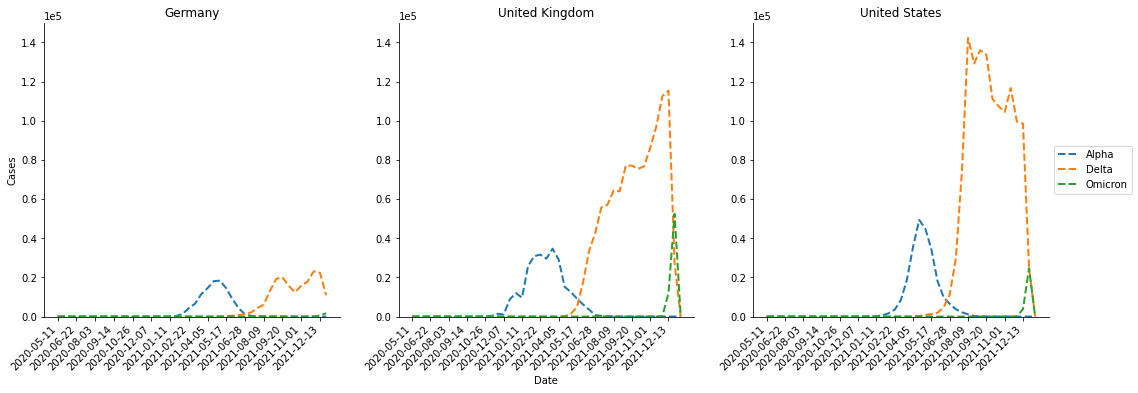

In [16]:
# plot instead on 3 subplots
# Create a new figure of size 18 by 6 inches (width and height) with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

top_countries = ['Germany', 'United Kingdom', 'United States']
top_variants = ['Alpha', 'Delta', 'Omicron']
ax = [ax1, ax2, ax3] 

for (i,country) in enumerate(top_countries):
    for (j,variant) in enumerate(top_variants):
        variant_df = covid_df[covid_df['variant'] == variant]
        variant_country_df = variant_df[variant_df['location'] == country]
        time_df = variant_country_df.groupby('date').sum()
        # plot time-series for this variant
        ax[i].plot(time_df.index,  time_df["num_sequences"], linestyle="--", linewidth=2, label=variant)
        ax[i].title.set_text(country)
#scale y axis
for axes in ax:
    axes.set_ylim(0,1.5e5)
    # reduce number of ticks
    axes.set_xticks(np.arange(0, len(time_df.index), 3.0))

# set legend
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# rotate axis
fig.autofmt_xdate(rotation=45)

# titles
ax2.set_xlabel('Date')
ax1.set_ylabel('Cases')
plt.show()